# Project 5: Communicate Data Findings

## Table of Contents

<a href="#assess">Assessing Data</a>

<a href="#clean">Cleaning Data</a>

#### Analysis and Visualization

<a href="#uanalysis">Univariate Analysis</a>

<a href="#bianalysis">Bivariate Analysis</a>

<a href="#manalysis">Multivariate Analysis</a>

In [1]:
#importing libararies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the datafile into dataframe
df = pd.read_csv(r'C:\Users\Bharat\Downloads\Udacity Project\2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


<a id='assess'></a>
### Assessing the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


- start_time, end_time are strings
- start_station_id, end_station_id, bike_id are int
- member_birth_year is float
- member_gender, user_type are object

In [4]:
#checking for duplicacy
df.duplicated().sum()

0

In [5]:
#for missing records
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

In [6]:
df.member_gender.value_counts()

Male      348318
Female     98621
Other       6299
Name: member_gender, dtype: int64

In [7]:
df.member_birth_year.describe()

count    453159.000000
mean       1980.404787
std          10.513488
min        1886.000000
25%        1974.000000
50%        1983.000000
75%        1988.000000
max        1999.000000
Name: member_birth_year, dtype: float64

- minimum birth year is 1886 which is wrongly captured

### Assessment

#### Quality Issues
- start_time, end_time are strings
- start_station_id, end_station_id, bike_id are int
- member_birth_year is float
- minimum birth year is 1886 which is wrongly captured
- member_gender, user_type are object

<a id='clean'></a>
## Cleaning

In [8]:
#creating copy of the original dataframe
df_clean = df.copy()

##### Define: Change variables: start_time, end_time from strings to datetime

In [9]:
#code
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [10]:
#test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: datetime64[ns](2), float64(5), int64(4), object(4)
memory usage: 59.5+ MB


##### Define: Convert start_station_id, end_station_id, bike_id from int to strings

In [11]:
#code
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)
df_clean.bike_id = df_clean.bike_id.astype(str)

In [12]:
#test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null object
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null object
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null object
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: datetime64[ns](2), float64(5), int64(1), object(7)
memory usage: 59.5+ MB


##### Define: Add new column member_age and convert member_birth_year from float to int

In [13]:
df_clean.member_birth_year.head()

0    1987.0
1    1965.0
2       NaN
3       NaN
4    1997.0
Name: member_birth_year, dtype: float64

In [14]:
#adding member age based on member_birth_year
df_clean['member_age'] = 2019-df_clean['member_birth_year']

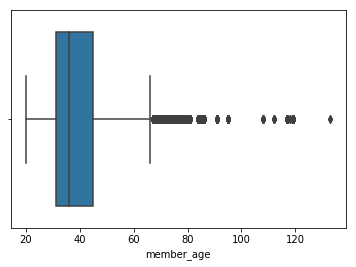

In [15]:
sns.boxplot(data=df_clean, x='member_age');

In [16]:
#removing ourliers i.e., age greater than 65
df_clean = df_clean.query('member_age < 65')

In [17]:
#test
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,96,Laguna St at Hayes St,37.776435,-122.426244,96,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,32.0
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,88,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,88,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,54.0
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,3167,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3167,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,22.0
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,3539,Addison St at Fourth St,37.866249,-122.299371,3539,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female,28.0
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,2311,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,2311,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990.0,Male,29.0


In [18]:
#converting member_age and member_birth_year to int
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)
df_clean.member_age = df_clean.member_age.astype(int)

In [19]:
#test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444977 entries, 0 to 519699
Data columns (total 16 columns):
duration_sec               444977 non-null int64
start_time                 444977 non-null datetime64[ns]
end_time                   444977 non-null datetime64[ns]
start_station_id           444977 non-null object
start_station_name         444977 non-null object
start_station_latitude     444977 non-null float64
start_station_longitude    444977 non-null float64
end_station_id             444977 non-null object
end_station_name           444977 non-null object
end_station_latitude       444977 non-null float64
end_station_longitude      444977 non-null float64
bike_id                    444977 non-null object
user_type                  444977 non-null object
member_birth_year          444977 non-null int32
member_gender              444977 non-null object
member_age                 444977 non-null int32
dtypes: datetime64[ns](2), float64(4), int32(2), int64(1), object(7)
mem

In [20]:
df_clean.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,96,Laguna St at Hayes St,37.776435,-122.426244,96,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,32


##### Define: Convert member_gender, user_type from strings(objects) to categorical variables

In [21]:
#code
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.user_type = df_clean.user_type.astype('category')

In [22]:
#test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444977 entries, 0 to 519699
Data columns (total 16 columns):
duration_sec               444977 non-null int64
start_time                 444977 non-null datetime64[ns]
end_time                   444977 non-null datetime64[ns]
start_station_id           444977 non-null object
start_station_name         444977 non-null object
start_station_latitude     444977 non-null float64
start_station_longitude    444977 non-null float64
end_station_id             444977 non-null object
end_station_name           444977 non-null object
end_station_latitude       444977 non-null float64
end_station_longitude      444977 non-null float64
bike_id                    444977 non-null object
user_type                  444977 non-null category
member_birth_year          444977 non-null int32
member_gender              444977 non-null category
member_age                 444977 non-null int32
dtypes: category(2), datetime64[ns](2), float64(4), int32(2), int64(

## Exploratory Analysis

<a id='uanalysis'></a>
### Univariate Exploration

In [23]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,96,Laguna St at Hayes St,37.776435,-122.426244,96,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,32
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,88,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,88,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,54
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,3167,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3167,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,22
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,3539,Addison St at Fourth St,37.866249,-122.299371,3539,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991,Female,28
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,2311,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,2311,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990,Male,29


###### Exporing duration_sec variable

###### Question: What's the most common time duration for which a bike is rented

In [24]:
log_data = np.log10(df_clean.duration_sec)

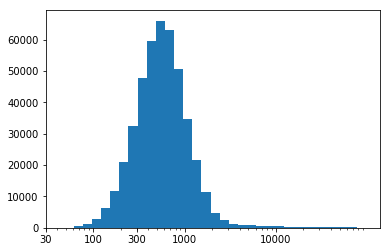

In [25]:
bin_edges = 10 ** np.arange(log_data.min(), log_data.max() + 0.1, 0.1)
plt.hist(data=df_clean, x=df_clean.duration_sec, bins=bin_edges)
ticks = [30,100,300,1000,10000]
plt.xscale('log')
plt.xticks(ticks=ticks, labels=ticks);

###### Observation: bike is rented mostly for 300 to 1200 seconds i.e., between 5 minutes and 20 minutes

###### Exploring rented bike distance based on start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude

In [26]:
#https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

from math import sin, cos, sqrt, atan2, radians

#creating function to calculate distance
def distance (start_lat,start_long,end_lat,end_long):
    R = 6373.0 #(approximate radius of earth in km)
    start_lat  = radians(start_lat)
    start_long = radians(start_long)
    end_lat    = radians(end_lat)
    end_long   = radians(end_long)
    
    dlon = end_long - start_long
    dlat = end_lat - start_lat
    
    a = sin(dlat / 2)**2 + cos(start_lat) * cos(end_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    
    #converting Km into meters
    return np.float64(round(1000*distance))

In [27]:
df_clean['distance'] = df_clean.apply(lambda i: distance(i['start_station_latitude'],i['start_station_longitude'],i['end_station_latitude'],i['end_station_longitude']),axis=1)
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age,distance
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,96,Laguna St at Hayes St,37.776435,-122.426244,96,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,32,943.0
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,88,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,88,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,54,3071.0
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,3167,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3167,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,22,637.0
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,3539,Addison St at Fourth St,37.866249,-122.299371,3539,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991,Female,28,0.0
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,2311,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,2311,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990,Male,29,1518.0


In [28]:
df_clean.distance.describe()

count    444977.000000
mean       1602.509797
std         983.580500
min           0.000000
25%         923.000000
50%        1409.000000
75%        2073.000000
max       62313.000000
Name: distance, dtype: float64

###### Question: What's the common distance travelled range

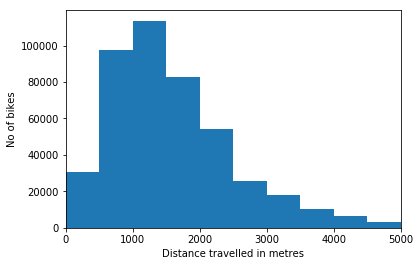

In [29]:
#plotting histogram of distance variable

bin_edges = np.arange(0, 62500, 500)
plt.hist(data = df_clean, x ='distance', bins = bin_edges)
plt.xlim(0, 5000)
plt.xlabel('Distance travelled in metres')
plt.ylabel('No of bike trips');

###### Observation: Most of rented bikes travelled between 500 metres (0.5 Km) to 2000 meters (2 Km) in a trip

###### Exploring user_type variable

###### Question: Which user type has larger base

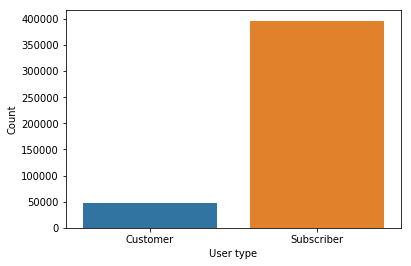

In [30]:
sns.countplot(data=df_clean, x='user_type');
plt.xlabel('User type')
plt.ylabel('Count');

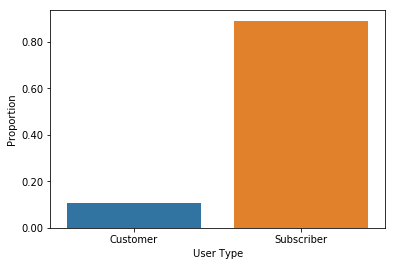

In [31]:
#plotting relative frequencies

n_points = df_clean.shape[0]
max_count = df_clean.user_type.value_counts().max()
max_prop = max_count/n_points

tick_props = np.arange(0, max_prop, 0.20)
labels = ['{:0.2f}'.format(i) for i in tick_props]

sns.countplot(data=df_clean, x='user_type')
plt.yticks(tick_props*n_points, labels=labels)
plt.xlabel('User Type')
plt.ylabel('Proportion');

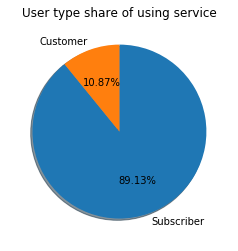

In [126]:
count=df_clean.user_type.value_counts()
plt.pie(count, labels=count.index, startangle=90, counterclock=False, autopct='%1.2f%%')
plt.title('User type share of using service');

###### Observation: Around 90% users are Subscriber of bike service and 10% are customers

###### Exploring member_gender variable 

###### Question: Which gender uses the service more often

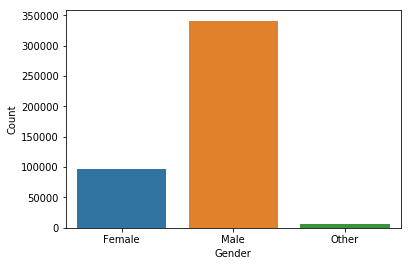

In [69]:
sns.countplot(data=df_clean, x='member_gender');
plt.xlabel('Gender')
plt.ylabel('Count');

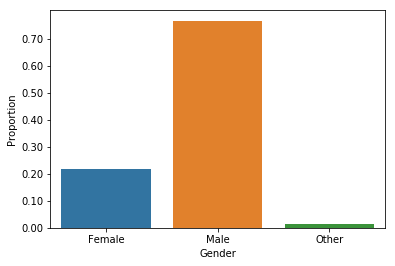

In [33]:
#plotting relative frequencies

n_points = df_clean.shape[0]
max_count = df_clean.member_gender.value_counts().max()
max_prop = max_count/n_points

tick_props = np.arange(0, max_prop, 0.10)
labels = ['{:0.2f}'.format(i) for i in tick_props]

sns.countplot(data=df_clean, x='member_gender')
plt.yticks(tick_props*n_points, labels=labels)
plt.xlabel('Gender')
plt.ylabel('Proportion');

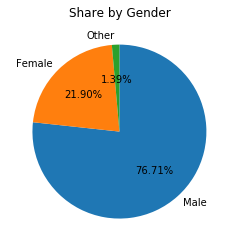

In [129]:
count=df_clean.member_gender.value_counts()
plt.pie(count, labels=count.index, startangle=90, counterclock=False, autopct='%1.2f%%')
plt.title('Share by Gender');

###### Observation: Around 77% are Males, 22% are Females

<a id='bianalysis'></a>
### Bivariate Exploration

In [34]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age,distance
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,96,Laguna St at Hayes St,37.776435,-122.426244,96,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,32,943.0
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,88,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,88,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,54,3071.0
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,3167,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3167,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,22,637.0
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,3539,Addison St at Fourth St,37.866249,-122.299371,3539,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991,Female,28,0.0
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,2311,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,2311,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990,Male,29,1518.0


In [35]:
df_clean.member_age.describe()

count    444977.000000
mean         37.987930
std           9.475128
min          20.000000
25%          31.000000
50%          36.000000
75%          44.000000
max          64.000000
Name: member_age, dtype: float64

In [36]:
#creating segments of l_age(life age periods) like 20s, 30s from member_age function

bins = [20,30,40,50,65]
bin_labels = ['20s','30s','40s','50s']

df_clean['l_age'] = pd.cut(df_clean.member_age, bins, labels=bin_labels)
df_clean.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age,distance,l_age
176971,453,2017-11-02 09:05:08.983,2017-11-02 09:12:42.288,660,Irwin St at 8th St,37.766883,-122.399579,660,Franklin Square,37.764555,-122.410345,660,Customer,1992,Female,27,981.0,20s
394514,374,2017-08-30 17:17:48.123,2017-08-30 17:24:02.144,2119,2nd St at S Park St,37.782411,-122.392706,2119,Howard St at Beale St,37.789756,-122.394643,2119,Subscriber,1990,Male,29,835.0,20s
52923,418,2017-12-11 07:54:47.381,2017-12-11 08:01:45.850,2627,DeFremery Park,37.812331,-122.285171,2627,West Oakland BART Station,37.805318,-122.294837,2627,Subscriber,1983,Male,36,1153.0,30s


In [55]:
df_clean.groupby('l_age')['duration_sec','member_age','distance'].mean()

,duration_sec,member_age,distance
l_age,,,
20s,891.961869,27.230947,1609.542110
30s,803.432639,35.014752,1627.419064
40s,808.688977,45.017558,1587.893729
50s,852.225074,55.604751,1535.798242


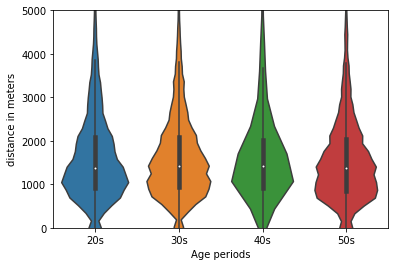

In [50]:
sns.violinplot(data=df_clean, x='l_age', y='distance')
plt.xlabel('Age periods')
plt.ylabel('distance in meters')
plt.ylim(0,5000);

In [62]:
#extracting start time month name using Series dt.strftime funtion
df_clean['month']=df_clean['start_time'].dt.strftime('%B')
df_clean['day']=df_clean['start_time'].dt.strftime('%a')
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age,distance,l_age,month,day
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,96,Laguna St at Hayes St,37.776435,-122.426244,96,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,32,943.0,30s,December,Sun
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,88,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,88,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,54,3071.0,50s,December,Sun
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,3167,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3167,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,22,637.0,20s,December,Sun
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,3539,Addison St at Fourth St,37.866249,-122.299371,3539,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991,Female,28,0.0,20s,December,Sun
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,2311,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,2311,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990,Male,29,1518.0,20s,December,Sun


###### Question: How's the bike sharing trend over weekdays as compared to weekends.

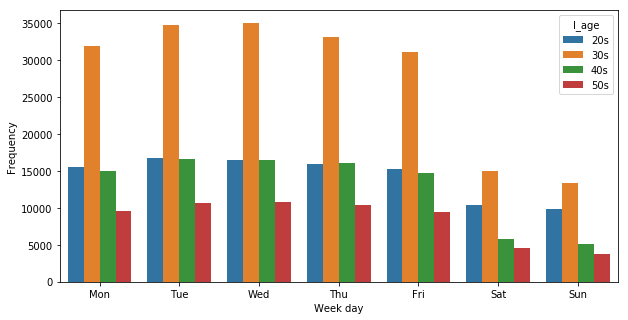

In [71]:
plt.figure(figsize=[10,5])
order= ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.countplot(data=df_clean, x='day', hue='l_age',order=order)
plt.xlabel('Week day')
plt.ylabel('Frequency');

###### Observation: Mostly people are renting bikes during weekdays than weekends with most common age period: 30s

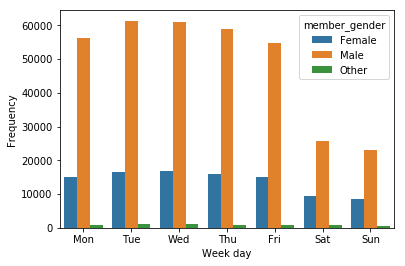

In [74]:
sns.countplot(data=df_clean, x='day', hue='member_gender',order=order)
plt.xlabel('Week day')
plt.ylabel('Frequency');

Males are using the service more frequently than females and others. 
There is not any significant change in this trend over weekend or weekdays.

###### Exploring user_type vs day variable

###### Question: How different users use the service over week

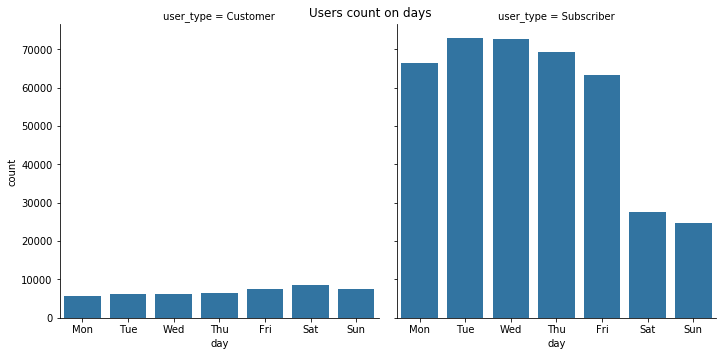

In [127]:
# Users monthly usage of bike service
base_color = sns.color_palette()[0]
order= ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.catplot(data=df_clean, x='day', col="user_type", order=order, color=base_color, kind='count')
plt.suptitle('Users count on days');

###### Observation: For Customers, bikes are rented more on weekends in contrast to Subscribers,which are using this service more on weekdays

<a id='manalysis'></a>
### Multivariate Exploration

###### Exploring relationship between user_type, member_gender and Number of Bike rides

###### Question: How user base and gender is linked with trips taken

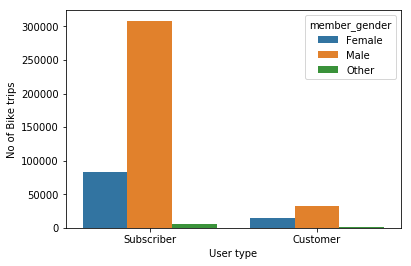

In [90]:
sns.countplot(data=df_clean, x="user_type", hue="member_gender", order=df_clean.user_type.value_counts().index)
plt.xlabel('User type')
plt.ylabel('No of Bike trips');

###### Observation: For Subscribers, No of bike trips are much larger for Males than Females. This some change in Customers segment as even though the rides taken by males are larger but proportion difference by Males and Females is not that much large as compared to Subscribers.

##### Exploring user_type and member_gender relationship with duration

<Figure size 720x432 with 0 Axes>

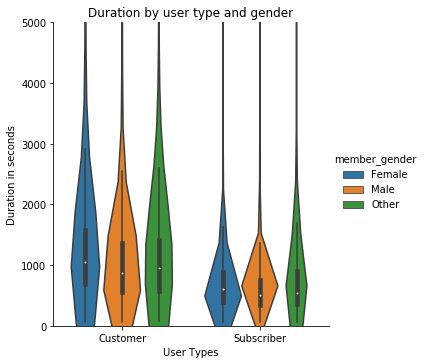

In [101]:
plt.figure(figsize=[10,6])
sns.catplot(data=df_clean, x='user_type', y="duration_sec", hue="member_gender", kind="violin")
plt.title('Duration by user type and gender')
plt.xlabel('User Types')
plt.ylabel('Duration in seconds')
plt.ylim(0,5000);

###### Observation: Females take longer trips than Males

In [108]:
df_clean.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age,distance,l_age,month,day
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,96,Laguna St at Hayes St,37.776435,-122.426244,96,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,32,943.0,30s,December,Sun


In [110]:
df_clean.duration_sec.describe()

count    444977.000000
mean        832.213939
std        2525.975163
min          61.000000
25%         364.000000
50%         555.000000
75%         837.000000
max       86252.000000
Name: duration_sec, dtype: float64

##### Exploring duration for member_age (for different user_type)

###### Question: What's the highest duration of users in particular age range

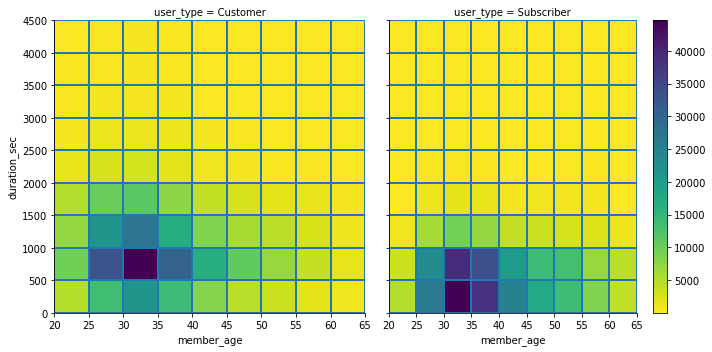

In [115]:
xbin = np.arange(df_clean['member_age'].min(), df_clean['member_age'].max()+5, 5)
ybin = np.arange(0, 5000, 500)

g = sns.FacetGrid(data = df_clean, col = 'user_type',height=5)
g.map(plt.hist2d, 'member_age','duration_sec', cmin=0.5, cmap = 'viridis_r', bins=[xbin, ybin]);
plt.colorbar();

###### Observation: Highest duration of Customers are of 500 to 1000s and ages are between 30 - 35 year old.  Highest duration of Subscribers are starting from 0s to 500s and ages are between 30 - 35 year old.  

In [119]:
#saving the dataframe
df_clean.to_csv("clean_data.csv", index=False)

## End of Analysis

#### Project Submitted by:
#### Bharat.